In [2]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




from PIL import Image
import os



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from scipy.stats import boxcox

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
data= pd.read_csv("./data/nutrients_csvfile.csv")

data.head()


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [4]:
data.shape

(335, 10)

In [5]:
data.columns

Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [7]:
data.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,335,335,335,334,335,335,333,335,335,335
unique,329,61,103,152,40,45,38,57,80,16
top,Butter,1 cup,100,100,1,t,0,0,0,"Breads, cereals, fastfood,grains"
freq,3,120,38,14,53,115,174,116,45,45


In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(332, 10)

In [12]:
#remove , so we can convert it to numeric
data=data.replace(",","", regex=True)

In [13]:
#typo found
data=data.replace('t',0)

In [14]:
#took the average of the calories found at position 90 
data.Calories.iloc[90]=(8+44)/2

In [15]:
data.Calories.iloc[90]

26.0

In [16]:
#typo found at position 90
data['Fat']=data['Fat'].replace("t'",0, regex=True)

In [17]:
#typo found at position 80
data['Fiber']=data['Fiber'].replace('a',0,regex=True)

In [18]:
data['Grams']=pd.to_numeric(data['Grams'])
data['Calories']=pd.to_numeric(data['Calories'])
data['Protein']=pd.to_numeric(data['Protein'])
data['Fat']=pd.to_numeric(data['Fat'])
data['Sat.Fat']=pd.to_numeric(data['Sat.Fat'])
data['Fiber']=pd.to_numeric(data['Fiber'])
data['Carbs']=pd.to_numeric(data['Carbs'])

In [19]:
data.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat       int64
Fiber       float64
Carbs       float64
Category     object
dtype: object

# todo:
## scale the data
## sort values

[Text(0.5, 0, 'Category'), Text(0, 0.5, 'Count')]

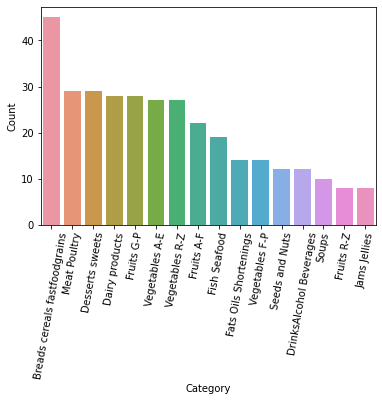

In [20]:
ax= sns.countplot(x='Category',data=data, order = data['Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80,)
ax.set(xlabel='Category', ylabel='Count')


[Text(0, 0, 'Breads cereals fastfoodgrains'),
 Text(1, 0, 'Desserts sweets'),
 Text(2, 0, 'Meat Poultry'),
 Text(3, 0, 'Dairy products'),
 Text(4, 0, 'Fruits G-P'),
 Text(5, 0, 'Vegetables A-E'),
 Text(6, 0, 'Vegetables R-Z'),
 Text(7, 0, 'Fruits A-F'),
 Text(8, 0, 'Fish Seafood'),
 Text(9, 0, 'Fats Oils Shortenings'),
 Text(10, 0, 'Vegetables F-P'),
 Text(11, 0, 'DrinksAlcohol Beverages'),
 Text(12, 0, 'Seeds and Nuts'),
 Text(13, 0, 'Soups'),
 Text(14, 0, 'Fruits R-Z'),
 Text(15, 0, 'Jams Jellies')]

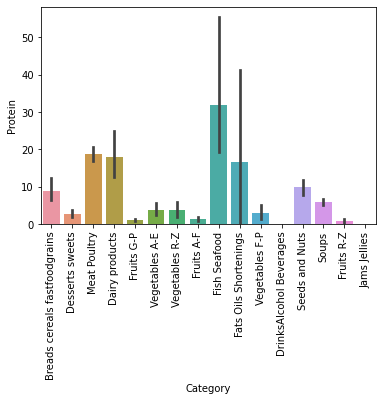

In [31]:
# fig = sns.barplot(x='Protein',y='Category', data=data, order = data['Category'].value_counts().index)

ax = sns.barplot(y="Protein", x="Category", data=data,order = data.value_counts('Category').index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[Text(0, 0, 'Breads cereals fastfoodgrains'),
 Text(1, 0, 'Meat Poultry'),
 Text(2, 0, 'Desserts sweets'),
 Text(3, 0, 'Dairy products'),
 Text(4, 0, 'Fruits G-P'),
 Text(5, 0, 'Vegetables A-E'),
 Text(6, 0, 'Vegetables R-Z'),
 Text(7, 0, 'Fruits A-F'),
 Text(8, 0, 'Fish Seafood'),
 Text(9, 0, 'Fats Oils Shortenings'),
 Text(10, 0, 'Vegetables F-P'),
 Text(11, 0, 'Seeds and Nuts'),
 Text(12, 0, 'DrinksAlcohol Beverages'),
 Text(13, 0, 'Soups'),
 Text(14, 0, 'Fruits R-Z'),
 Text(15, 0, 'Jams Jellies')]

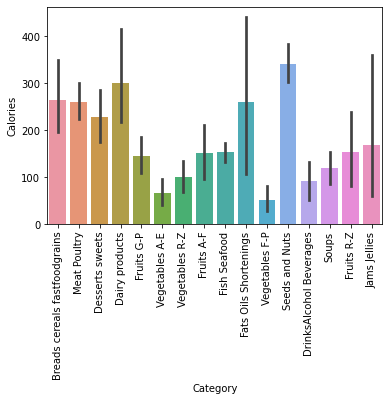

In [30]:

ax=sns.barplot(y= 'Calories', x='Category', data =data, order = data['Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Breads cereals fastfoodgrains'),
 Text(1, 0, 'Desserts sweets'),
 Text(2, 0, 'Meat Poultry'),
 Text(3, 0, 'Dairy products'),
 Text(4, 0, 'Fruits G-P'),
 Text(5, 0, 'Vegetables A-E'),
 Text(6, 0, 'Vegetables R-Z'),
 Text(7, 0, 'Fruits A-F'),
 Text(8, 0, 'Fish Seafood'),
 Text(9, 0, 'Fats Oils Shortenings'),
 Text(10, 0, 'Vegetables F-P'),
 Text(11, 0, 'DrinksAlcohol Beverages'),
 Text(12, 0, 'Seeds and Nuts'),
 Text(13, 0, 'Soups'),
 Text(14, 0, 'Fruits R-Z'),
 Text(15, 0, 'Jams Jellies')]

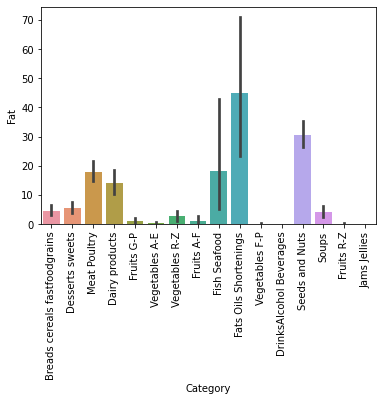

In [38]:
ax=sns.barplot(x= 'Category', y='Fat', data =data, order = data.value_counts('Category').index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


In [ ]:
# data['Count']=data.Category.groupby(data.Category)
# data
# df['Count'] = pd.Series(data.Category.groupby(data.Category))
# df = pd.DataFrame({'Category': Category,
#                    'Count': Count})


In [ ]:
# df=['Category'],['Count']
# df['Count'] = pd.Series(data.Category.groupby(data.Category))
# df = pd.DataFrame({'Category':data['Category'],
#                    'Count': data['Count']})

In [ ]:
# df